In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.externals.six import StringIO 
from sklearn import metrics
from sklearn.metrics import classification_report


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Prepare Data

In [2]:

OOB_10=pd.read_csv("AdaBoost (AllFeatures - OOB - 10).csv", index_col=0)

OOB_10.shape

(10, 1)

In [3]:
target_names=['Not Fraud 0', 'Fraud 1']

In [4]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [5]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [6]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [7]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

In [8]:
dim=100

## 2. Load Decision Tree Model

In [9]:
dTree = joblib.load('DecisionTree-gini.pkl') 
n_trees=25

In [10]:
#n_estimators_list = [21, 27, 31, 35, 41, 51, 71, 91, 101, 131, 155, 161, 165, 191, 201]
#n_estimators_list = [19,21, 27, 31, 35, 41, 47, 51]

n_estimators_list = [15, 17, 19, 21, 27, 31]
avg_per_estimator = []

for n_estimators in n_estimators_list:
    
    avg = []
    for i in range(0, dim):
        clf = AdaBoostClassifier(base_estimator=dTree, n_estimators=n_trees, learning_rate=0.1)
        
        importance = clf.fit(X_train_resampled[OOB_10.index.values].copy(), y_train_resampled['Class'].values)
        print(n_estimators, i, importance.feature_importances_)
        avg.append(importance.feature_importances_)
        
    avg_per_estimator.append(np.mean(avg))

15 0 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
15 1 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
15 2 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
15 3 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
15 4 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
15 5 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
15 6 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
15 7 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
15 8 [0.26558574 0.1699337  0.08048357 0.02152682 0.0450

15 69 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
15 70 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
15 71 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
15 72 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
15 73 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
15 74 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
15 75 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
15 76 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
15 77 [0.26559225 0.16993011 0.08048122 0.021528

17 38 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11493416 0.06956088 0.08660196]
17 39 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
17 40 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
17 41 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
17 42 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
17 43 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
17 44 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
17 45 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
17 46 [0.26559225 0.16993011 0.08048122 0.021528

19 7 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
19 8 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
19 9 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
19 10 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
19 11 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
19 12 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
19 13 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
19 14 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11493416 0.06956088 0.08660196]
19 15 [0.26558574 0.1699337  0.08048357 0.02152682 

19 77 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
19 78 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11493416 0.06956088 0.08660196]
19 79 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
19 80 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
19 81 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
19 82 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
19 83 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
19 84 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
19 85 [0.26559225 0.16993011 0.08048122 0.021528

21 46 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
21 47 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
21 48 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
21 49 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
21 50 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
21 51 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
21 52 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
21 53 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
21 54 [0.26559225 0.16993011 0.08048122 0.021528

27 15 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
27 16 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
27 17 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
27 18 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
27 19 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
27 20 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
27 21 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
27 22 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
27 23 [0.26558574 0.1699337  0.08048357 0.021526

27 84 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
27 85 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
27 86 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
27 87 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
27 88 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
27 89 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
27 90 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.1149134  0.06570071 0.08660357]
27 91 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
27 92 [0.26559225 0.16993011 0.08048122 0.021528

31 53 [0.26558574 0.1699337  0.08048357 0.02152682 0.04508377 0.06346427
 0.08288377 0.11487553 0.06956088 0.08660196]
31 54 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.06956088 0.08666058]
31 55 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11487553 0.0696195  0.08660196]
31 56 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06570071 0.08666219]
31 57 [0.26558574 0.1699337  0.08048357 0.02152682 0.04502515 0.06346427
 0.08288377 0.11493416 0.06956088 0.08660196]
31 58 [0.26559225 0.16993011 0.08048122 0.02152853 0.0488849  0.06346825
 0.08289705 0.11485478 0.06575933 0.08660357]
31 59 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
31 60 [0.26559225 0.16993011 0.08048122 0.02152853 0.04894352 0.06346825
 0.08289705 0.11485478 0.06570071 0.08660357]
31 61 [0.26558574 0.1699337  0.08048357 0.021526

In [11]:
avg_per_estimator

[0.1, 0.1, 0.09999999999999999, 0.1, 0.10000000000000002, 0.10000000000000002]

In [12]:
final_n_estimator = n_estimators_list[avg_per_estimator.index(max(avg_per_estimator))]
print("n_est", final_n_estimator, "OOB",max(avg_per_estimator))

n_est 27 OOB 0.10000000000000002


## 3. AdaBoost Classifier Model

In [13]:
clf = AdaBoostClassifier(base_estimator=dTree, n_estimators=15, learning_rate=0.1)
        
importance = clf.fit(X_train_resampled[OOB_10.index.values].copy(), y_train_resampled['Class'].values)
print(importance.feature_importances_)

[0.32158698 0.19692955 0.0828902  0.01339343 0.05694196 0.03704615
 0.07015799 0.07602576 0.04510451 0.09992347]


In [14]:

y_pred_val = clf.predict(X_val[OOB_10.index.values].copy())

In [19]:
from collections import Counter
print(sorted(Counter(y_pred_val).items()))

[(0, 56504), (1, 458)]


## 4. Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[56490   375]
 [   14    83]]


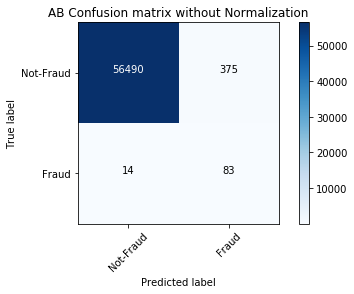

Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]


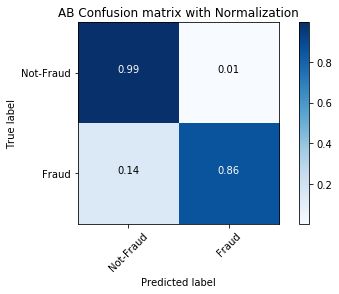

In [21]:
cm = confusion_matrix(y_val['Class'].values, y_pred_val)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'AB Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'AB Confusion matrix with Normalization')
plt.show()


## 5. Metrics Scores


In [19]:
print(classification_report(y_val['Class'].values, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      1.00     56865
     Fraud 1       0.18      0.86      0.30        97

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [20]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9934406049415282
Specificity :  0.8556701030927835


In [21]:

acc= accuracy_score( y_val['Class'].values, y_pred_val)
recall = recall_score( y_val['Class'].values,y_pred_val, average='binary')
precision = precision_score( y_val['Class'].values, y_pred_val)
f1 = f1_score( y_val['Class'].values, y_pred_val, average='binary')
average = average_precision_score( y_val['Class'].values, y_pred_val)
kappa = cohen_kappa_score( y_val['Class'].values, y_pred_val)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9932059969804431
Recall score 0.8556701030927835
Precision 0.18201754385964913
f1_score 0.3001808318264015
Average precision-recall score: 0.16
Kappa Score 0.29820993710524435


## 6. Save Scores

In [22]:
result = pd.read_csv("../Results/model_Result_final.csv", index_col=0)

In [23]:
model_Results = pd.DataFrame([['AdaBoost (n=15) with OOB_10', acc, precision, recall, f1, average, kappa, specificity1, sensitivity1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen', 'Specificity', 'Sensitivity'])

In [24]:
result.columns

Index(['Accuracy', 'Average', 'F1 Score', 'Kappa Cohen', 'Model', 'Precision',
       'Recall', 'Sensitivity', 'Specificity'],
      dtype='object')

In [25]:
x = result.append(model_Results, ignore_index=True)

In [26]:
x.to_csv("../Results/model_Result_final.csv")

In [27]:
x

,Accuracy,Average,F1 Score,Kappa Cohen,Model,Precision,Recall,Sensitivity,Specificity
0,0.996647,0.277870,0.467967,0.466641,Random Forest All Features,0.320611,0.865979,0.996870,0.865979
1,0.993908,0.174253,0.326214,0.324346,Random Forest (n=27) with OOB_9,0.200957,0.865979,0.994126,0.865979
2,0.995225,0.219926,0.387387,0.385752,Random Forest (n=35) with OOB_12,0.247839,0.886598,0.995410,0.886598
3,0.993241,0.159751,0.303797,0.301837,AdaBoost Simple Classifier,0.184211,0.865979,0.993458,0.865979
4,0.993206,0.155993,0.300181,0.298210,AdaBoost (n=15) with OOB_10,0.182018,0.855670,0.993441,0.855670


Text(0.5,1,'Precision-Recall curve: AP=0.16')

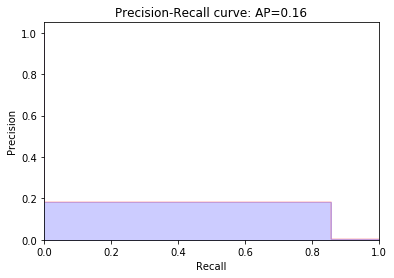

In [28]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve( y_val['Class'].values, y_pred_val)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

In [29]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve' , linewidth = 2, color= 'darkorange')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2, color ='navy', linestyle='--')
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

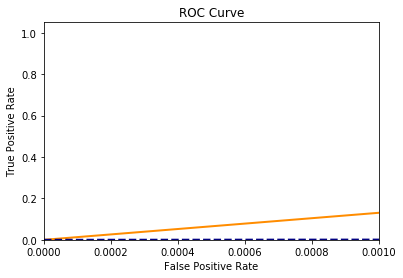

In [30]:
fpr, tpr, t = roc_curve( y_val['Class'].values, y_pred_val)
plot_roc()

## 7. Save Model 

In [31]:
joblib.dump(clf, 'AdaBoost (OOB_10 Features - Optimal Parameters).pkl') 

['AdaBoost (OOB_10 Features - Optimal Parameters).pkl']